In [6]:
import numpy as np
import matplotlib.pyplot as plt 

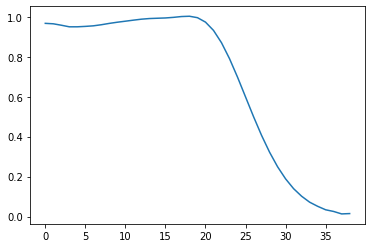

In [11]:
delta_x = 1
quant_pontos = 41

l = quant_pontos*delta_x-1
t = 18

delta_t = 1
c = 1

'''
    Linspace é muito parecida, mas com uma pequena diferença. 
    Linspace retorna números espaçados de modo uniforme em um intervalo. 
    Dessa forma, dado um ponto inicial e de parada, 
    assim como a quantidade de valores, linspace irá distribuí-los
    uniformemente para você em uma matriz NumPy. Isso é especialmente 
    útil para visualizações de dados e declaração de eixos durante a plotagem.
'''

x = np.linspace(0, l, quant_pontos)

# quantidade de passos de tempo
quant_tempo = int(t/delta_t)

# numero de courant NI
v = c*(delta_t/delta_x)

# dimensão da matriz A
quant_linha_A  = quant_pontos-2
quant_coluna_A = quant_pontos-2

# criação das variáveis para solução do sistema. criando tudo zero.
A     = np.zeros((quant_linha_A,quant_coluna_A))
C     = np.zeros(quant_linha_A)
u_old = np.zeros(quant_pontos)
u_new = np.zeros(quant_pontos)
a     = np.zeros(quant_coluna_A-1)
b     = np.zeros(quant_coluna_A-1)
d     = np.zeros(quant_coluna_A)

# substituindo os zeros pelo valor devido.
a[:] = v/2
b[:] = -v/2
d[:] = 1

# condição inicial
indice = 0
for i in x:
    if i <= 10.:
        u_old[indice] = 1
    else:
        u_old[indice] = 0
    indice+=1

# construção da matriz A tridiagonal
for i in range(0,quant_linha_A):
    A[i,i]   = d[i]

for i in range(1,quant_linha_A):
    A[i-1,i]   = a[i-2]
    A[i,i-1] = b[i-2]

# Solução do esquema
for i in range(1,quant_tempo):
    # atualização do vetor C
    C[:] = u_old[1:-1]
    # o valor do C1 é C1-b1*U0 porque o contorno é conhecido, então u0 deve ficar em C 
    # Assim também como o Cm.
    C[0]  = C[0]  - b[0] *u_old[0]
    C[-1] = C[-1] - b[-1]*u_old[-1]

    # chama um solver de sistema.

    u_new = np.linalg.solve(A,C)
    #print("linalg anterior: ",u_new)
    #u_new = thomas(A,C)
    # Atualiza a solução old.
    u_old[1:-1] = u_new

plt.plot(u_new);

In [8]:
def thomas(A, C):
    lin = len(A)
    col = len(A)
    # algoritmo de Thomas
    linal = np.linalg.solve(A, C)
    A[0, 1] = A[0, 1] / A[0, 0]
    for i in range(1, lin - 1):
        A[i, i + 1] = A[i, i + 1] / (A[i, i] - (A[i, i - 1] * A[i - 1, i]))
        A[i, i - 1] = 0
    A[-1, -2] = 0
    C[0] = C[0] / A[0, 0]
    for i in range(1, lin):
        C[i] = (C[i] - A[i, i - 1] * C[i - 1]) / (A[i, i] - (A[i, i - 1] * A[i - 1, i]))

    u_t = np.zeros(lin)

    u_t[-1] = C[-1]
    for j in range(lin - 2, -1, -1):
        # u_num[1,j+1] = (C[j]-A[j,j+1]-u_num[1,j+2])/A[j,j]
        #print(j)
        u_t[j] = C[j] - A[j, j + 1] * u_t[j + 1]

    aa = 
    
    aa[:] = linal[:]
    print("linalg: ", aa.round(3))
    print("thomas: ", u_t.round(3))

    return u_t

SyntaxError: invalid syntax (2554196376.py, line 23)

In [9]:
def thomas(A, C):
    lin = len(A)
    col = len(A)
    # algoritmo de Thomas
    A[0, 1] = A[0, 1] / A[0, 0]
    for i in range(1, lin - 1):
        A[i, i + 1] = A[i, i + 1] / (A[i, i] - (A[i, i - 1] * A[i - 1, i]))
        A[i, i - 1] = 0
    A[-1, -2] = 0
    C[0] = C[0] / A[0, 0]
    for i in range(1, lin):
        C[i] = (C[i] - A[i, i - 1] * C[i - 1]) / (A[i, i] - (A[i, i - 1] * A[i - 1, i]))

    u_t = np.zeros(lin)

    u_t[-1] = C[-1]
    for j in range(lin - 2, -1, -1):
        # u_num[1,j+1] = (C[j]-A[j,j+1]-u_num[1,j+2])/A[j,j]
        #print(j)
        u_t[j] = C[j] - A[j, j + 1] * u_t[j + 1]

    #print(A)
    aa = u_t
    linal = np.linalg.solve(A, C)
    aa[:] = linal[:]
    print("linalg: ", aa.round(3))
    print("thomas: ", u_t.round(3))

    return u_t